In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file1 = "./iterationTime.dat"

def iterationTime(file): 

    df = pd.read_csv(file)
    df.columns = ['One']
    df['One'] = df['One'].astype('string')
    new = df['One'].str.split(' ', expand = True) 
    df['Time']= new[0].astype('float') 
    df['Iteration']= new[1].astype('float') 
    df['ExecutionTime']= new[2].astype('float') 
    df['Residual']= new[3].astype('float') 
    df.drop(columns =['One'], inplace = True) 

    return df

filepath1 = "fine_mesh/base"
file1_label = "Fine Mesh"
filepath1 = filepath1 + "/iterationTime.dat"
df_1 = iterationTime(filepath1)

filepath2 = "fine_mesh/ML"
file2_label = "Fine Mesh ML"
filepath2 = filepath2 + "/iterationTime.dat"
df_2 = iterationTime(filepath2)

# filepath3 = "coarse_mesh/ellipticPlate_ML"
# file3_label = "Coarse Mesh"
# filepath3 = filepath3 + "/iterationTime.dat"
# df_3 = iterationTime(filepath3)

filepath4 = "fine_mesh/mapFields"
file4_label = "Map Fields"
filepath4 = filepath4 + "/iterationTime.dat"
df_4 = iterationTime(filepath4)

# filepath6 = "fine_mesh/ellipticPlate_testConverged"
# file6_label = "Test Converged"
# filepath6 = filepath6 + "/iterationTime.dat"
# df_6 = iterationTime(filepath6) 

maxTimestep = 1


/tmp/ipykernel_12299/2434190932.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')
/tmp/ipykernel_12299/2434190932.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')


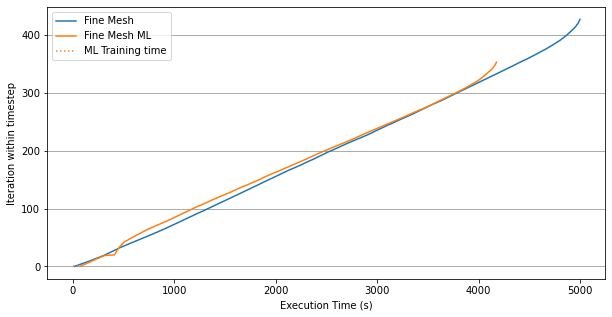

/tmp/ipykernel_12299/2434190932.py:82: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')


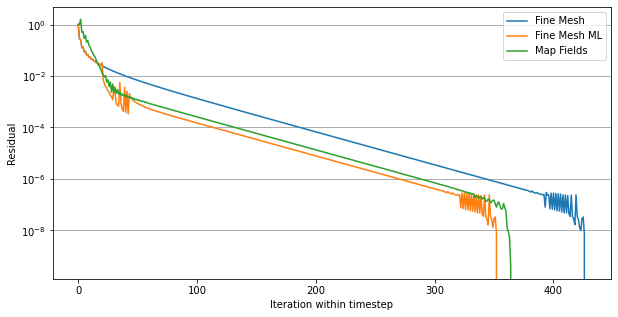

/tmp/ipykernel_12299/2434190932.py:101: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')


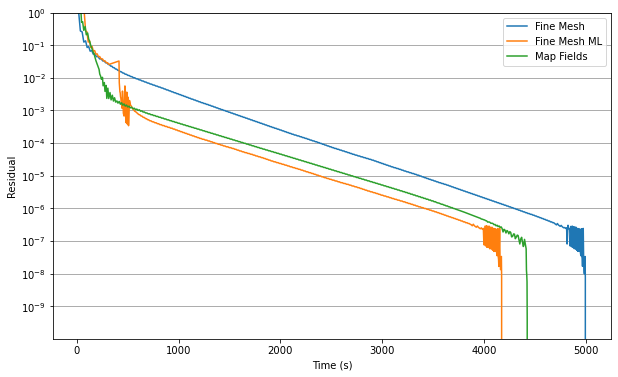

For tolerance of 1e-2
ML speed up is 28.54932168709916 %
Map speed up is 58.84729792465482 %
ML Speed up vs Map is -73.62329740118659 %


For tolerance of 1e-3
ML speed up is 68.69496477057913 %
Map speed up is 57.03729163086441 %
ML Speed up vs Map is 27.134399999999996 %


For tolerance of 1e-4
ML speed up is 43.01408144311783 %
Map speed up is 31.357357407608838 %
ML Speed up vs Map is 16.981753025926054 %


For tolerance of 1e-5
ML speed up is 29.32230404160025 %
Map speed up is 20.036150907779568 %
ML Speed up vs Map is 11.612939145927283 %


For tolerance of 1e-6
ML speed up is 20.504139063209493 %
Map speed up is 13.882336504092482 %
ML Speed up vs Map is 7.689250137901952 %


For tolerance of 1e-7
ML speed up is 16.97540602477664 %
Map speed up is 9.649108240061096 %
ML Speed up vs Map is 8.108716629141215 %


For tolerance of 1e-8
ML speed up is 16.30699819530779 %
Map speed up is 11.351313414878687 %
ML Speed up vs Map is 5.590251780741961 %


For tolerance of 1e-9
ML speed u

In [3]:
training_time = 56

ML_case_time = df_2["ExecutionTime"] + training_time



plt.figure(figsize=(10,5))
plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')
# 1
plt.plot(df_1["ExecutionTime"], df_1["Iteration"], label = file1_label) 
# 2
ML_case_time = df_2["ExecutionTime"] + training_time
plt.plot(ML_case_time, df_2["Iteration"],  label = file2_label) 

# plt.plot(df_3["ExecutionTime"], df_3["Iteration"], label = file3_label) 

# # # 4
plt.plot(np.arange(0, training_time + 1), np.zeros(training_time + 1), label = "ML Training time", c = "C1", linestyle = ":")
# # 5
# plt.plot(df_4["ExecutionTime"], df_4["Iteration"], label = file4_label) 
# # 6
# plt.plot(df_6["ExecutionTime"], df_6["Iteration"], label = file6_label) 
# ML_case_time_no_testConverged = df_6["ExecutionTime"] + training_time
# plt.plot(ML_case_time_no_testConverged, df_6["Iteration"], label = file6_label) 


# Time scatter

interval=1e-1
residual_scatter = np.array([])
for i in np.arange(0, len(df_1["Iteration"])):

    if df_1["Residual"][i] < interval:
        residual_scatter = np.append(residual_scatter, i)
        interval = interval*1e-1

residual_scatter_1 = residual_scatter
# plt.scatter(df_1["ExecutionTime"][residual_scatter_1], df_1["Iteration"][residual_scatter_1], c="C0") 

interval=1e-1
residual_scatter = np.array([])
for i in np.arange(0, len(df_2["Iteration"])):

    if df_2["Residual"][i] < interval:
        residual_scatter = np.append(residual_scatter, i)
        interval = interval*1e-1

residual_scatter_2 = residual_scatter
# plt.scatter(ML_case_time[residual_scatter_2], df_2["Iteration"][residual_scatter_2], c="C1") 

interval=1e-1
residual_scatter = np.array([])
for i in np.arange(0, len(df_4["Iteration"])):

    if df_4["Residual"][i] < interval:
        residual_scatter = np.append(residual_scatter, i)
        interval = interval*1e-1

residual_scatter_4 = residual_scatter
# plt.scatter(df_4["ExecutionTime"][residual_scatter_4], df_4["Iteration"][residual_scatter_4], c="C2") 


plt.xlabel("Execution Time (s)")
plt.ylabel("Iteration within timestep")
plt.legend()
plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')
plt.savefig("post_processing/graph_1.png", dpi=300)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(df_1["Iteration"], df_1["Residual"], label = file1_label) 
plt.plot(df_2["Iteration"], df_2["Residual"],  label = file2_label) 
# plt.plot(df_3["Iteration"], df_3["Residual"],  label = file3_label) 
plt.plot(df_4["Iteration"], df_4["Residual"],  label = file4_label) 
# plt.plot(df_6["Iteration"], df_6["Residual"],  label = file6_label) 

plt.xlabel("Iteration within timestep")
plt.ylabel("Residual")
plt.yscale("log")
plt.legend()
plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')
plt.savefig("post_processing/graph_2.png", dpi=300)
plt.show()


plt.figure(figsize=(10,6))
plt.plot(df_1["ExecutionTime"], df_1["Residual"], label = file1_label) 
plt.plot(ML_case_time, df_2["Residual"],  label = file2_label) 
plt.plot(df_4["ExecutionTime"], df_4["Residual"],  label = file4_label) 
# plt.plot(df_6["ExecutionTime"], df_6["Residual"],  label = file6_label) 


plt.xlabel("Time (s)")
plt.ylabel("Residual")
plt.yscale("log")
plt.ylim(10e-11, 1)  # Set the lower limit to 10^5, upper limit as automatic
yticks = [10e-10, 10e-9, 10e-8, 10e-7, 10e-6, 10e-5, 0.001, 0.01, 0.1, 1]
plt.yticks(yticks)
plt.legend()
plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')
plt.savefig("post_processing/graph_3.png", dpi=300)
plt.show()



for i in np.arange(1, 9):
    
    print("For tolerance of 1e-" + str(i+1))
    print("ML speed up is " + str((np.array(df_1["ExecutionTime"][residual_scatter_1])[i] - np.array(ML_case_time[residual_scatter_2])[i])/np.array(df_1["ExecutionTime"][residual_scatter_1])[i]*100) + " %")
    print("Map speed up is " + str((np.array(df_1["ExecutionTime"][residual_scatter_1])[i] - np.array(df_4["ExecutionTime"][residual_scatter_4])[i])/np.array(df_1["ExecutionTime"][residual_scatter_1])[i]*100) + " %")
    print("ML Speed up vs Map is " + str((np.array(df_4["ExecutionTime"][residual_scatter_4])[i] - np.array(ML_case_time[residual_scatter_2])[i])/np.array(df_4["ExecutionTime"][residual_scatter_4])[i]*100) + " %")

    print("\n")

i = -1
print("Overall ML speed up = " + str((np.array(df_1["ExecutionTime"])[i] - np.array(ML_case_time)[i])/np.array(df_1["ExecutionTime"])[i]*100) + " %")
print("Overall Map speed up = " + str((np.array(df_1["ExecutionTime"])[i] - np.array(df_4["ExecutionTime"])[i])/np.array(df_1["ExecutionTime"])[i]*100) + " %")
print("Overall ML Speed up vs Map is = " + str((np.array(df_4["ExecutionTime"])[i] - np.array(ML_case_time)[i])/np.array(df_4["ExecutionTime"])[i]*100) + " %")


In [4]:
np.array(ML_case_time[residual_scatter_2])[5]

3413.91

In [5]:
np.array(df_4["ExecutionTime"][residual_scatter_4])[5]

3698.28

In [6]:
np.array(df_1["ExecutionTime"][residual_scatter_1])[5]

4294.45